# exps_logistic examples: rationales and gamma labels

This notebook loads the logistic regression dataset, shows paired natural language (NL) and code rationales with their γ labels, and summarizes γ label distributions. The default data source is the exps_performance results directory; adjust the path at the top if needed.

In [8]:
from pathlib import Path

import pandas as pd

from src.exps_logistic.data_utils import load_data, prepare_labels

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_rows", 50)

# Default results directory (from exps_performance runs)
RESULTS_DIR = Path("/nlpgpu/data/terry/ToolProj/src/exps_performance/results")
VALUE_BINS = 8

print(f"Results dir: {RESULTS_DIR}")

Results dir: /nlpgpu/data/terry/ToolProj/src/exps_performance/results


In [2]:
# Load data and prepare gamma labels
raw_df = load_data(str(RESULTS_DIR))
# Keep both NL and code entries
raw_df = raw_df[raw_df["rep"].isin(["nl", "code"])]

df = prepare_labels(raw_df, label_type="gamma", value_bins=VALUE_BINS)

# Basic cleaning: drop empty rationale/prompt rows
before = len(df)
df = df[df["rationale"].astype(str).str.len() > 0].copy()
df["prompt"] = df["prompt"].astype(str)
print(f"Rows kept after dropping empty rationale: {len(df)} / {before}")
df.head()

Rows kept after dropping empty rationale: 8810 / 8810


,kind,digits,prompt,rationale,rep,theta_new,gamma,label
0,kmp_matcher,6,,"KMP (Knuth-Morris-Pratt) matcher attempts to find occurrences of a key pattern within a string. Here, we need to search for the key [3 1 0 0 3 0] within the string [0 0 0 0 0 1]. First, I'll const...",nl,kmp_matcher__d6,kmp_matcher|d6|bNA,kmp_matcher|d6|bNA
1,kmp_matcher,6,,"```python\ndef solution() -> int:\n def kmp_matcher(string, key):\n """"""\n KMP (Knuth-Morris-Pratt) algorithm to find the first occurrence of key in string.\n Returns the st...",code,kmp_matcher__d6,kmp_matcher|d6|bNA,kmp_matcher|d6|bNA
2,kmp_matcher,13,,"To solve this KMP matcher problem, I need to search for the key pattern [1 0 3 3 3 3 1 0 3 2 0 0 3] within the string [0 0 0 0 0 0 0 0 0 0 0 1 1].\n\nFirst, let me analyze the string and key:\n- S...",nl,kmp_matcher__d13,kmp_matcher|d13|bNA,kmp_matcher|d13|bNA
3,kmp_matcher,13,,"```python\ndef solution() -> int:\n string = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]\n key = [1, 0, 3, 3, 3, 3, 1, 0, 3, 2, 0, 0, 3]\n \n # KMP matcher - find first occurrence of key i...",code,kmp_matcher__d13,kmp_matcher|d13|bNA,kmp_matcher|d13|bNA
4,kmp_matcher,13,,"In the KMP (Knuth-Morris-Pratt) matcher algorithm, we are searching for occurrences of a pattern (key) within a text (string). Here, the string is [0 0 0 0 0 0 0 0 0 0 0 1 1] and the key/pattern i...",nl,kmp_matcher__d13,kmp_matcher|d13|bNA,kmp_matcher|d13|bNA


## Paired NL and code rationale examples

Pairs are matched by `(kind, digits, prompt)` and show one NL rationale and one code rationale with the same underlying problem. Gamma labels follow the format `{kind}|d{digits}|b{bin_id}`.

In [3]:
def find_pairs(df: pd.DataFrame, max_pairs: int = 5) -> pd.DataFrame:
    key_cols = ["kind", "digits", "prompt"]
    wide = df.pivot_table(index=key_cols, columns="rep", values=["rationale", "gamma"], aggfunc="first")
    # keep rows where both nl and code exist
    wide = wide.dropna(subset=[("rationale", "nl"), ("rationale", "code")])
    wide = wide.reset_index()
    # flatten columns
    wide.columns = [
        "kind",
        "digits",
        "prompt",
        "gamma_code",
        "gamma_nl",
        "rationale_code",
        "rationale_nl",
    ]
    return wide.head(max_pairs)


paired_examples = find_pairs(df, max_pairs=5)
paired_examples[["kind", "digits", "gamma_nl", "gamma_code"]]

,kind,digits,gamma_nl,gamma_code
0,activity_selector,4,activity_selector|d4|bNA,activity_selector|d4|bNA
1,activity_selector,5,activity_selector|d5|bNA,activity_selector|d5|bNA
2,activity_selector,6,activity_selector|d6|bNA,activity_selector|d6|bNA
3,activity_selector,7,activity_selector|d7|bNA,activity_selector|d7|bNA
4,activity_selector,12,activity_selector|d12|bNA,activity_selector|d12|bNA


In [4]:
# Pretty-print the paired examples (truncated for readability)
from textwrap import shorten

for i, row in paired_examples.iterrows():
    print(f"Example {i + 1}: kind={row['kind']}, digits={row['digits']}")
    print(f"  gamma (nl):   {row['gamma_nl']}")
    print(f"  gamma (code): {row['gamma_code']}")
    print("  prompt: ", shorten(row["prompt"], width=200, placeholder="..."))
    print("  nl rationale:\n    " + shorten(row["rationale_nl"], width=400, placeholder="..."))
    print("  code rationale:\n    " + shorten(row["rationale_code"], width=400, placeholder="..."))
    print("-" * 80)

Example 1: kind=activity_selector, digits=4
  gamma (nl):   activity_selector|d4|bNA
  gamma (code): activity_selector|d4|bNA
  prompt:  
  nl rationale:
    The activity selection problem aims to select the maximum number of non-overlapping activities. Each activity has a start time (s) and finish time (f). We use a greedy algorithm: sort activities by finish time and select activities that don't overlap with previously selected ones. Given activities: - Activity 0: s=0.423, f=0.548 - Activity 1: s=0.645, f=0.715 - Activity 2: s=0.437, f=0.602 -...
  code rationale:
    ```python def solution() -> int: # Activity Selector Problem - Greedy Algorithm # Select maximum number of non-overlapping activities # Activities are sorted by finish time s = [0.423, 0.645, 0.437, 0.544] # start times f = [0.548, 0.715, 0.602, 0.891] # finish times # Create list of activities with indices activities = [(s[i], f[i], i) for i in range(len(s))] # Sort by finish time...
----------------------------------

## Gamma label examples

Gamma label format: `{kind}|d{digits}|b{bin_id}` where `bin_id` is derived from problem-specific parsed stats (see `make_gamma_label`). Below are distinct examples across kinds and digit settings.

In [5]:
unique_gamma = df[["kind", "digits", "gamma"]].drop_duplicates()
# Show one example per (kind, digits) where available
examples_gamma = unique_gamma.sort_values(["kind", "digits", "gamma"]).groupby(["kind", "digits"]).head(2)
examples_gamma.head(20)

,kind,digits,gamma
788,activity_selector,4,activity_selector|d4|bNA
790,activity_selector,5,activity_selector|d5|bNA
794,activity_selector,6,activity_selector|d6|bNA
796,activity_selector,7,activity_selector|d7|bNA
798,activity_selector,12,activity_selector|d12|bNA
800,activity_selector,13,activity_selector|d13|bNA
802,activity_selector,16,activity_selector|d16|bNA
804,activity_selector,17,activity_selector|d17|bNA
806,activity_selector,18,activity_selector|d18|bNA
810,activity_selector,19,activity_selector|d19|bNA


## Summary statistics

High-level counts for gamma labels and representations.

In [6]:
total = len(df)
unique_gamma_ct = df["gamma"].nunique()
rep_counts = df["rep"].value_counts().rename_axis("rep").reset_index(name="count")
kind_counts = df["kind"].value_counts().rename_axis("kind").reset_index(name="count")
digits_counts = df["digits"].value_counts().sort_index().rename_axis("digits").reset_index(name="count")

top_gamma = df["gamma"].value_counts().head(15).rename_axis("gamma").reset_index(name="count")

# Label diversity per (kind, digits)
kd_diversity = (
    df.assign(kd=df["kind"].astype(str) + "|d" + df["digits"].astype(str))
    .groupby("kd")["gamma"]
    .nunique()
    .rename("unique_gamma")
    .reset_index()
    .sort_values("unique_gamma", ascending=False)
)

print(f"Total samples: {total}")
print(f"Unique gamma labels: {unique_gamma_ct}")
print("\nCounts by rep:\n", rep_counts)
print("\nCounts by kind (top 10):\n", kind_counts.head(10))
print("\nCounts by digits:\n", digits_counts)
print("\nMost common gamma labels (top 15):\n", top_gamma)
print("\nGamma diversity per (kind,digits) (top 10):\n", kd_diversity.head(10))

Total samples: 8810
Unique gamma labels: 559

Counts by rep:
     rep  count
0    nl   4405
1  code   4405

Counts by kind (top 10):
          kind  count
0       gsm8k   2186
1  ilp_assign    348
2         sub    330
3         add    328
4         gcp    328
5         edp    328
6         rod    322
7         lcs    318
8        knap    316
9    ilp_prod    316

Counts by digits:
     digits  count
0        0   3710
1        2    370
2        4    462
3        5    102
4        6    212
..     ...    ...
56      59     18
57      60     22
58      62      8
59      63     26
60      64     14

[61 rows x 2 columns]

Most common gamma labels (top 15):
                   gamma  count
0          gsm8k|d0|bNA   2186
1            gcp|d0|bNA    328
2            edp|d0|bNA    328
3            ksp|d0|bNA    306
4            spp|d0|bNA    290
5            tsp|d0|bNA    272
6     ilp_assign|d16|b6     52
7      ilp_assign|d2|b0     50
8      ilp_prod|d16|b53     50
9             rod|d2|b2     4

## Data quality checks

Spot checks for missing text and unparseable gamma labels (`bNA`).

In [7]:
missing_rationale = (df["rationale"].astype(str).str.len() == 0).sum()
missing_prompt = (df["prompt"].astype(str).str.len() == 0).sum()
bna_count = df["gamma"].astype(str).str.contains("bNA").sum()

rep_sizes = df["rep"].value_counts()

print(f"Missing rationale rows: {missing_rationale}")
print(f"Missing prompt rows: {missing_prompt}")
print(f"Gamma labels with bNA: {bna_count}")
print("\nSample counts by rep:\n", rep_sizes)

Missing rationale rows: 0
Missing prompt rows: 3720
Gamma labels with bNA: 5906

Sample counts by rep:
 rep
nl      4405
code    4405
Name: count, dtype: int64


## Gamma label bar chart (top counts)

Bar plot for the provided gamma label counts.

/tmp/ipykernel_37186/3354471254.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(labels), palette="crest")


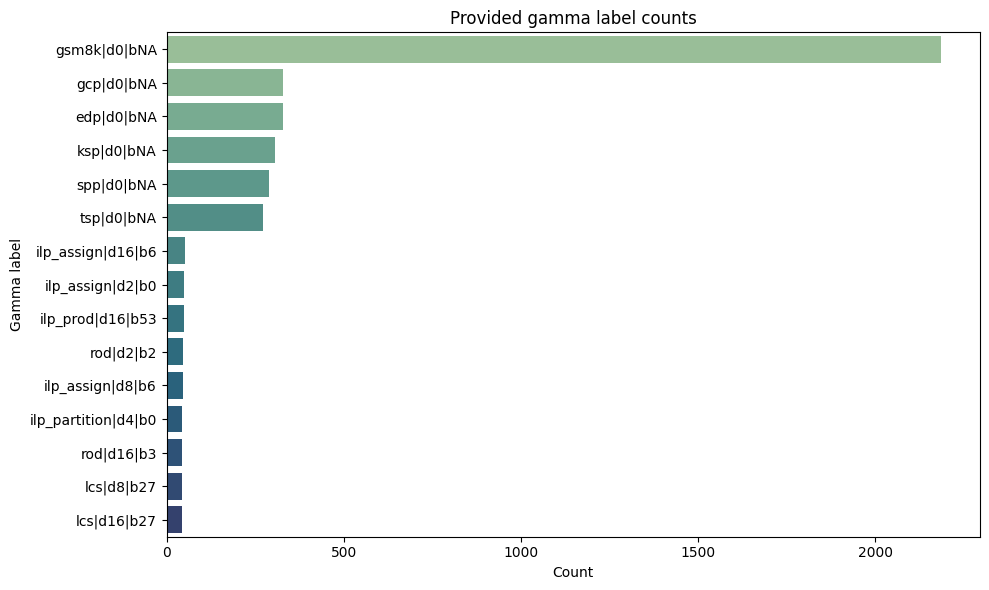

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Provided counts
label_counts = [
    ("gsm8k|d0|bNA", 2186),
    ("gcp|d0|bNA", 328),
    ("edp|d0|bNA", 328),
    ("ksp|d0|bNA", 306),
    ("spp|d0|bNA", 290),
    ("tsp|d0|bNA", 272),
    ("ilp_assign|d16|b6", 52),
    ("ilp_assign|d2|b0", 50),
    ("ilp_prod|d16|b53", 50),
    ("rod|d2|b2", 46),
    ("ilp_assign|d8|b6", 46),
    ("ilp_partition|d4|b0", 44),
    ("rod|d16|b3", 44),
    ("lcs|d8|b27", 44),
    ("lcs|d16|b27", 42),
]

labels, counts = zip(*label_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(labels), palette="crest")
plt.xlabel("Count")
plt.ylabel("Gamma label")
plt.title("Provided gamma label counts")
plt.tight_layout()
plt.show()